## IMPORTING LIBRARIES

In [1]:
# local modules
import exploredata

# external libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
                  

##### Function to load the dataset

In [2]:
def load_user_cookies_data(filename):
    if os.path.isfile(filename):
      return pd.read_csv(filename)
    else:
      return ("Invalid file name, make sure the filename is correct and is in the same package")

In [3]:
UserCookiesData = load_user_cookies_data("shopping.csv")

In [4]:
UserCookiesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
UserCookiesData.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
UserCookiesData['Revenue'] = UserCookiesData['Revenue'].astype(int)
UserCookiesData['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

## EXPLORATORY DATA ANALYSIS

* Here We will use the helper functions in the local explore.py module

In [7]:
#Prepare and split into train, validate, and test sets.
train, validate, test = exploredata.process_unencoded_data(data = UserCookiesData )


In [8]:
train.shape

(6834, 18)

In [9]:
train.select_dtypes('object').columns

Index(['Month', 'VisitorType'], dtype='object')

In [10]:

categorical_vars = train.select_dtypes('object').columns
quantitative_vars = train.select_dtypes('float').columns
int_vars = train.select_dtypes('int').columns

##### Exploring univariate variables

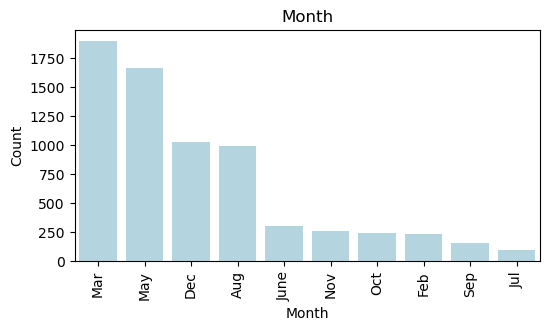

     Month  Count  Percent
May    Mar   1895    27.73
Nov    May   1657    24.25
Mar    Dec   1020    14.93
Dec    Aug    985    14.41
Oct   June    303     4.43
Sep    Nov    253     3.70
Jul    Oct    241     3.53
Aug    Feb    233     3.41
June   Sep    155     2.27
Feb    Jul     92     1.35


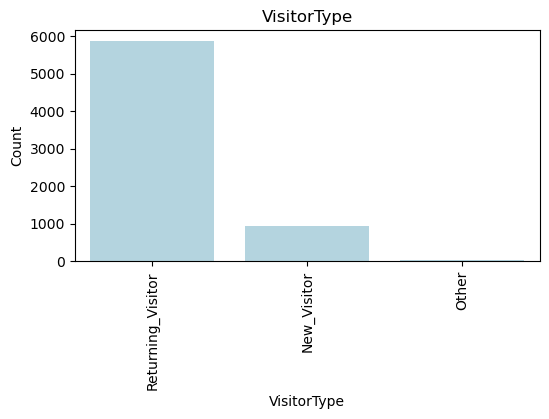

                         VisitorType  Count  Percent
Returning_Visitor  Returning_Visitor   5864    85.81
New_Visitor              New_Visitor    926    13.55
Other                          Other     44     0.64


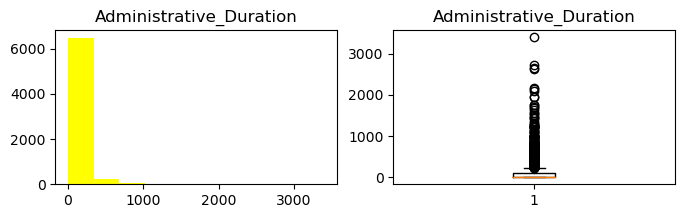

count    6834.000000
mean       80.627613
std       177.274015
min         0.000000
25%         0.000000
50%        10.000000
75%        94.860000
max      3398.750000
Name: Administrative_Duration, dtype: float64


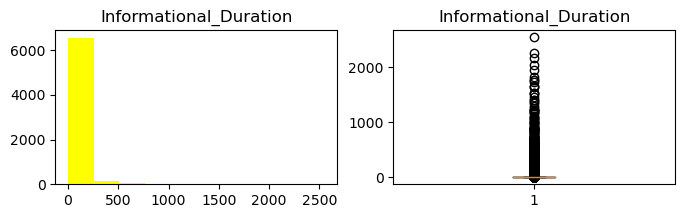

count    6834.000000
mean       35.811919
std       146.496341
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2549.375000
Name: Informational_Duration, dtype: float64


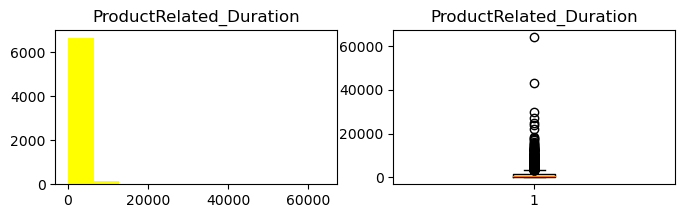

count     6834.000000
mean      1235.391218
std       2065.837009
min          0.000000
25%        201.250000
50%        626.954167
75%       1470.302083
max      63973.522230
Name: ProductRelated_Duration, dtype: float64


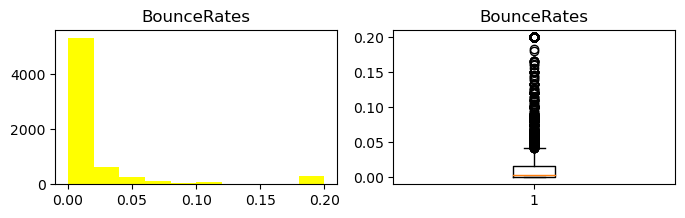

count    6834.000000
mean        0.020128
std         0.044730
min         0.000000
25%         0.000000
50%         0.003021
75%         0.016667
max         0.200000
Name: BounceRates, dtype: float64


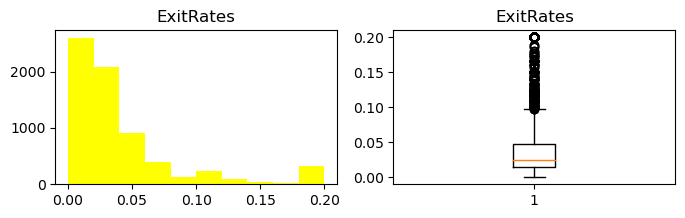

count    6834.000000
mean        0.041024
std         0.045602
min         0.000000
25%         0.014283
50%         0.025000
75%         0.047608
max         0.200000
Name: ExitRates, dtype: float64


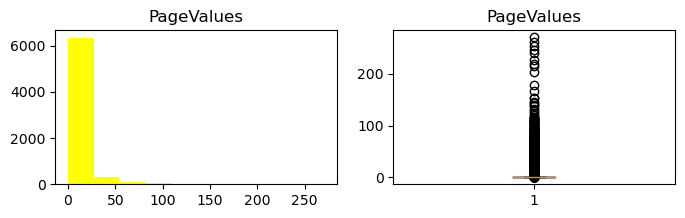

count    6834.000000
mean        5.829635
std        17.984670
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       270.784693
Name: PageValues, dtype: float64


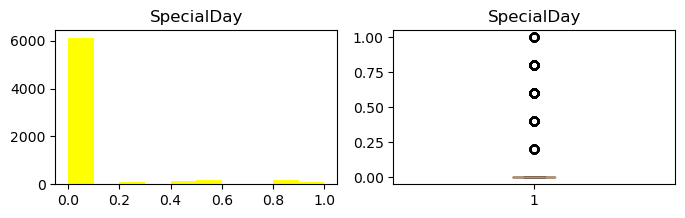

count    6834.000000
mean        0.062423
std         0.200588
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SpecialDay, dtype: float64


In [11]:
exploredata.univariate(train, categorical_vars, quantitative_vars)

##### Exploring Bivariate variables

c:\Users\simon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


       chi2   p-value  degrees of freedom
0  2.536001  0.111276                   1

observed:
 Revenue     0     1   All
Weekend                  
False    4467   803  5270
True     1299   265  1564
All      5766  1068  6834

expected:
             0          1
0  4446.41791  823.58209
1  1319.58209  244.41791


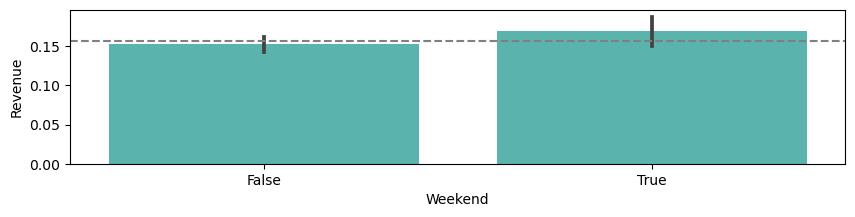


_____________________



In [12]:
exploredata.bivariate_categorical(data=train, target="Revenue", categorical_vars ="Weekend" )

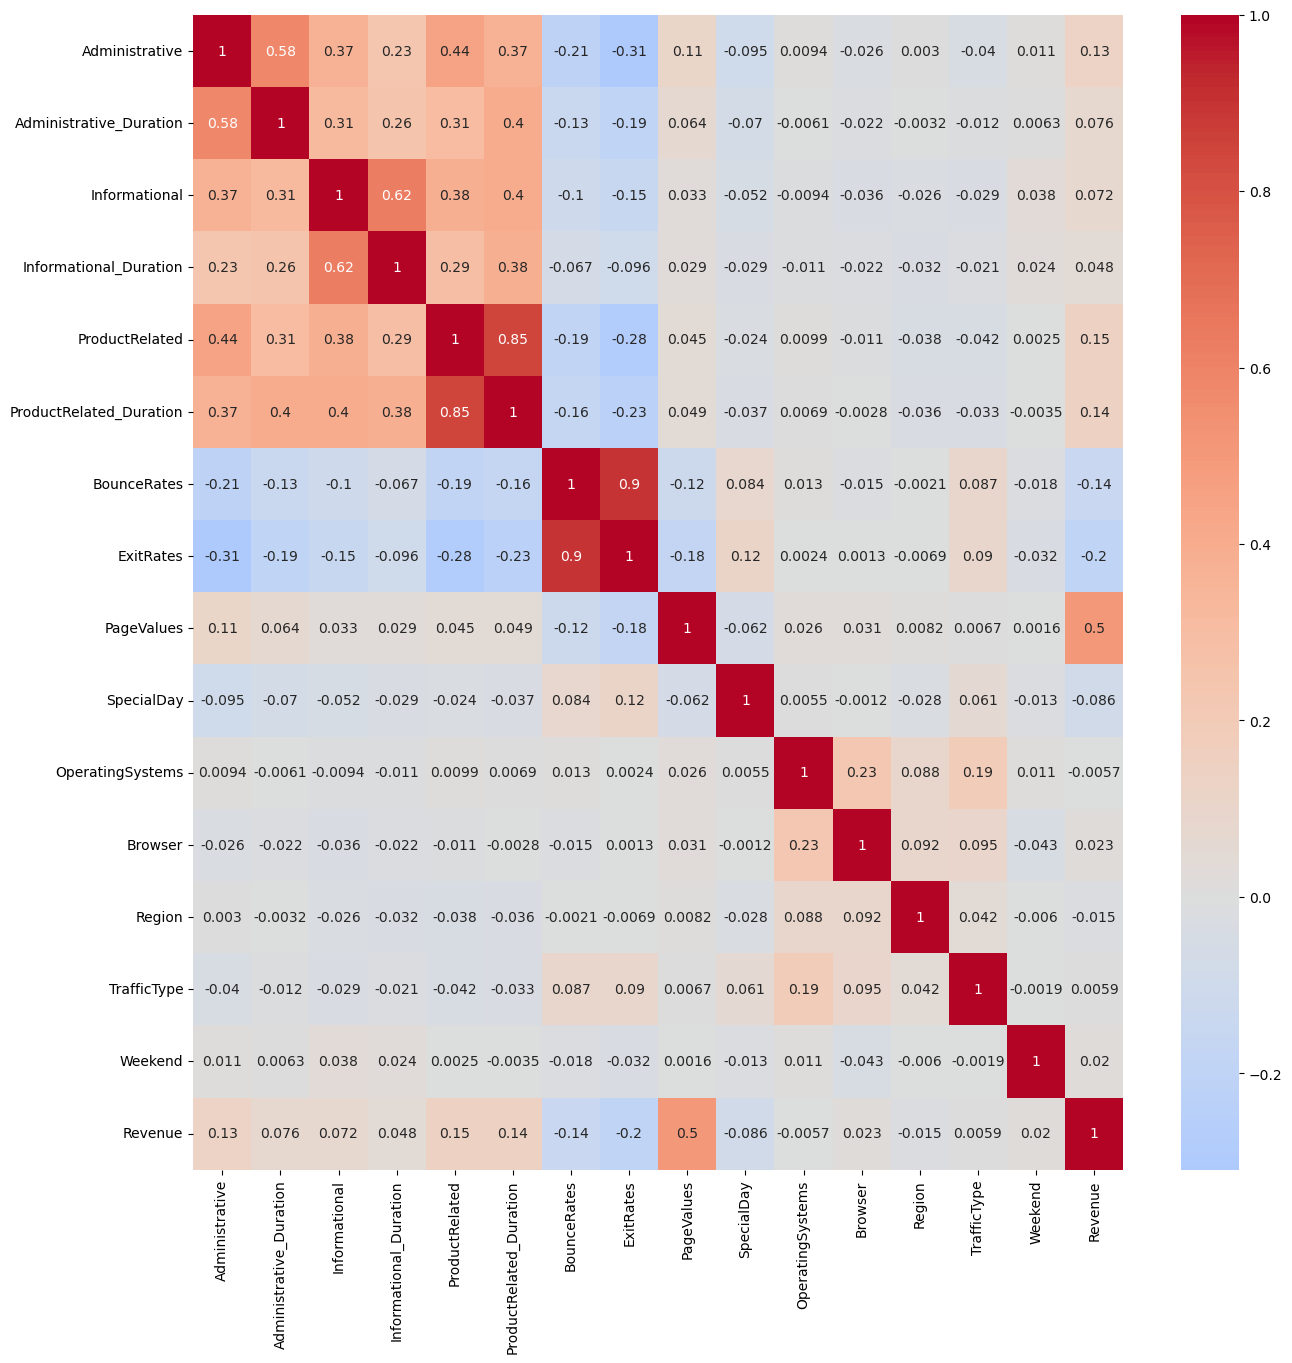

In [13]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.corr(), cmap='coolwarm', center=0, annot=True)
plt.show()

ValueError: object arrays are not supported

<Figure size 1000x500 with 0 Axes>

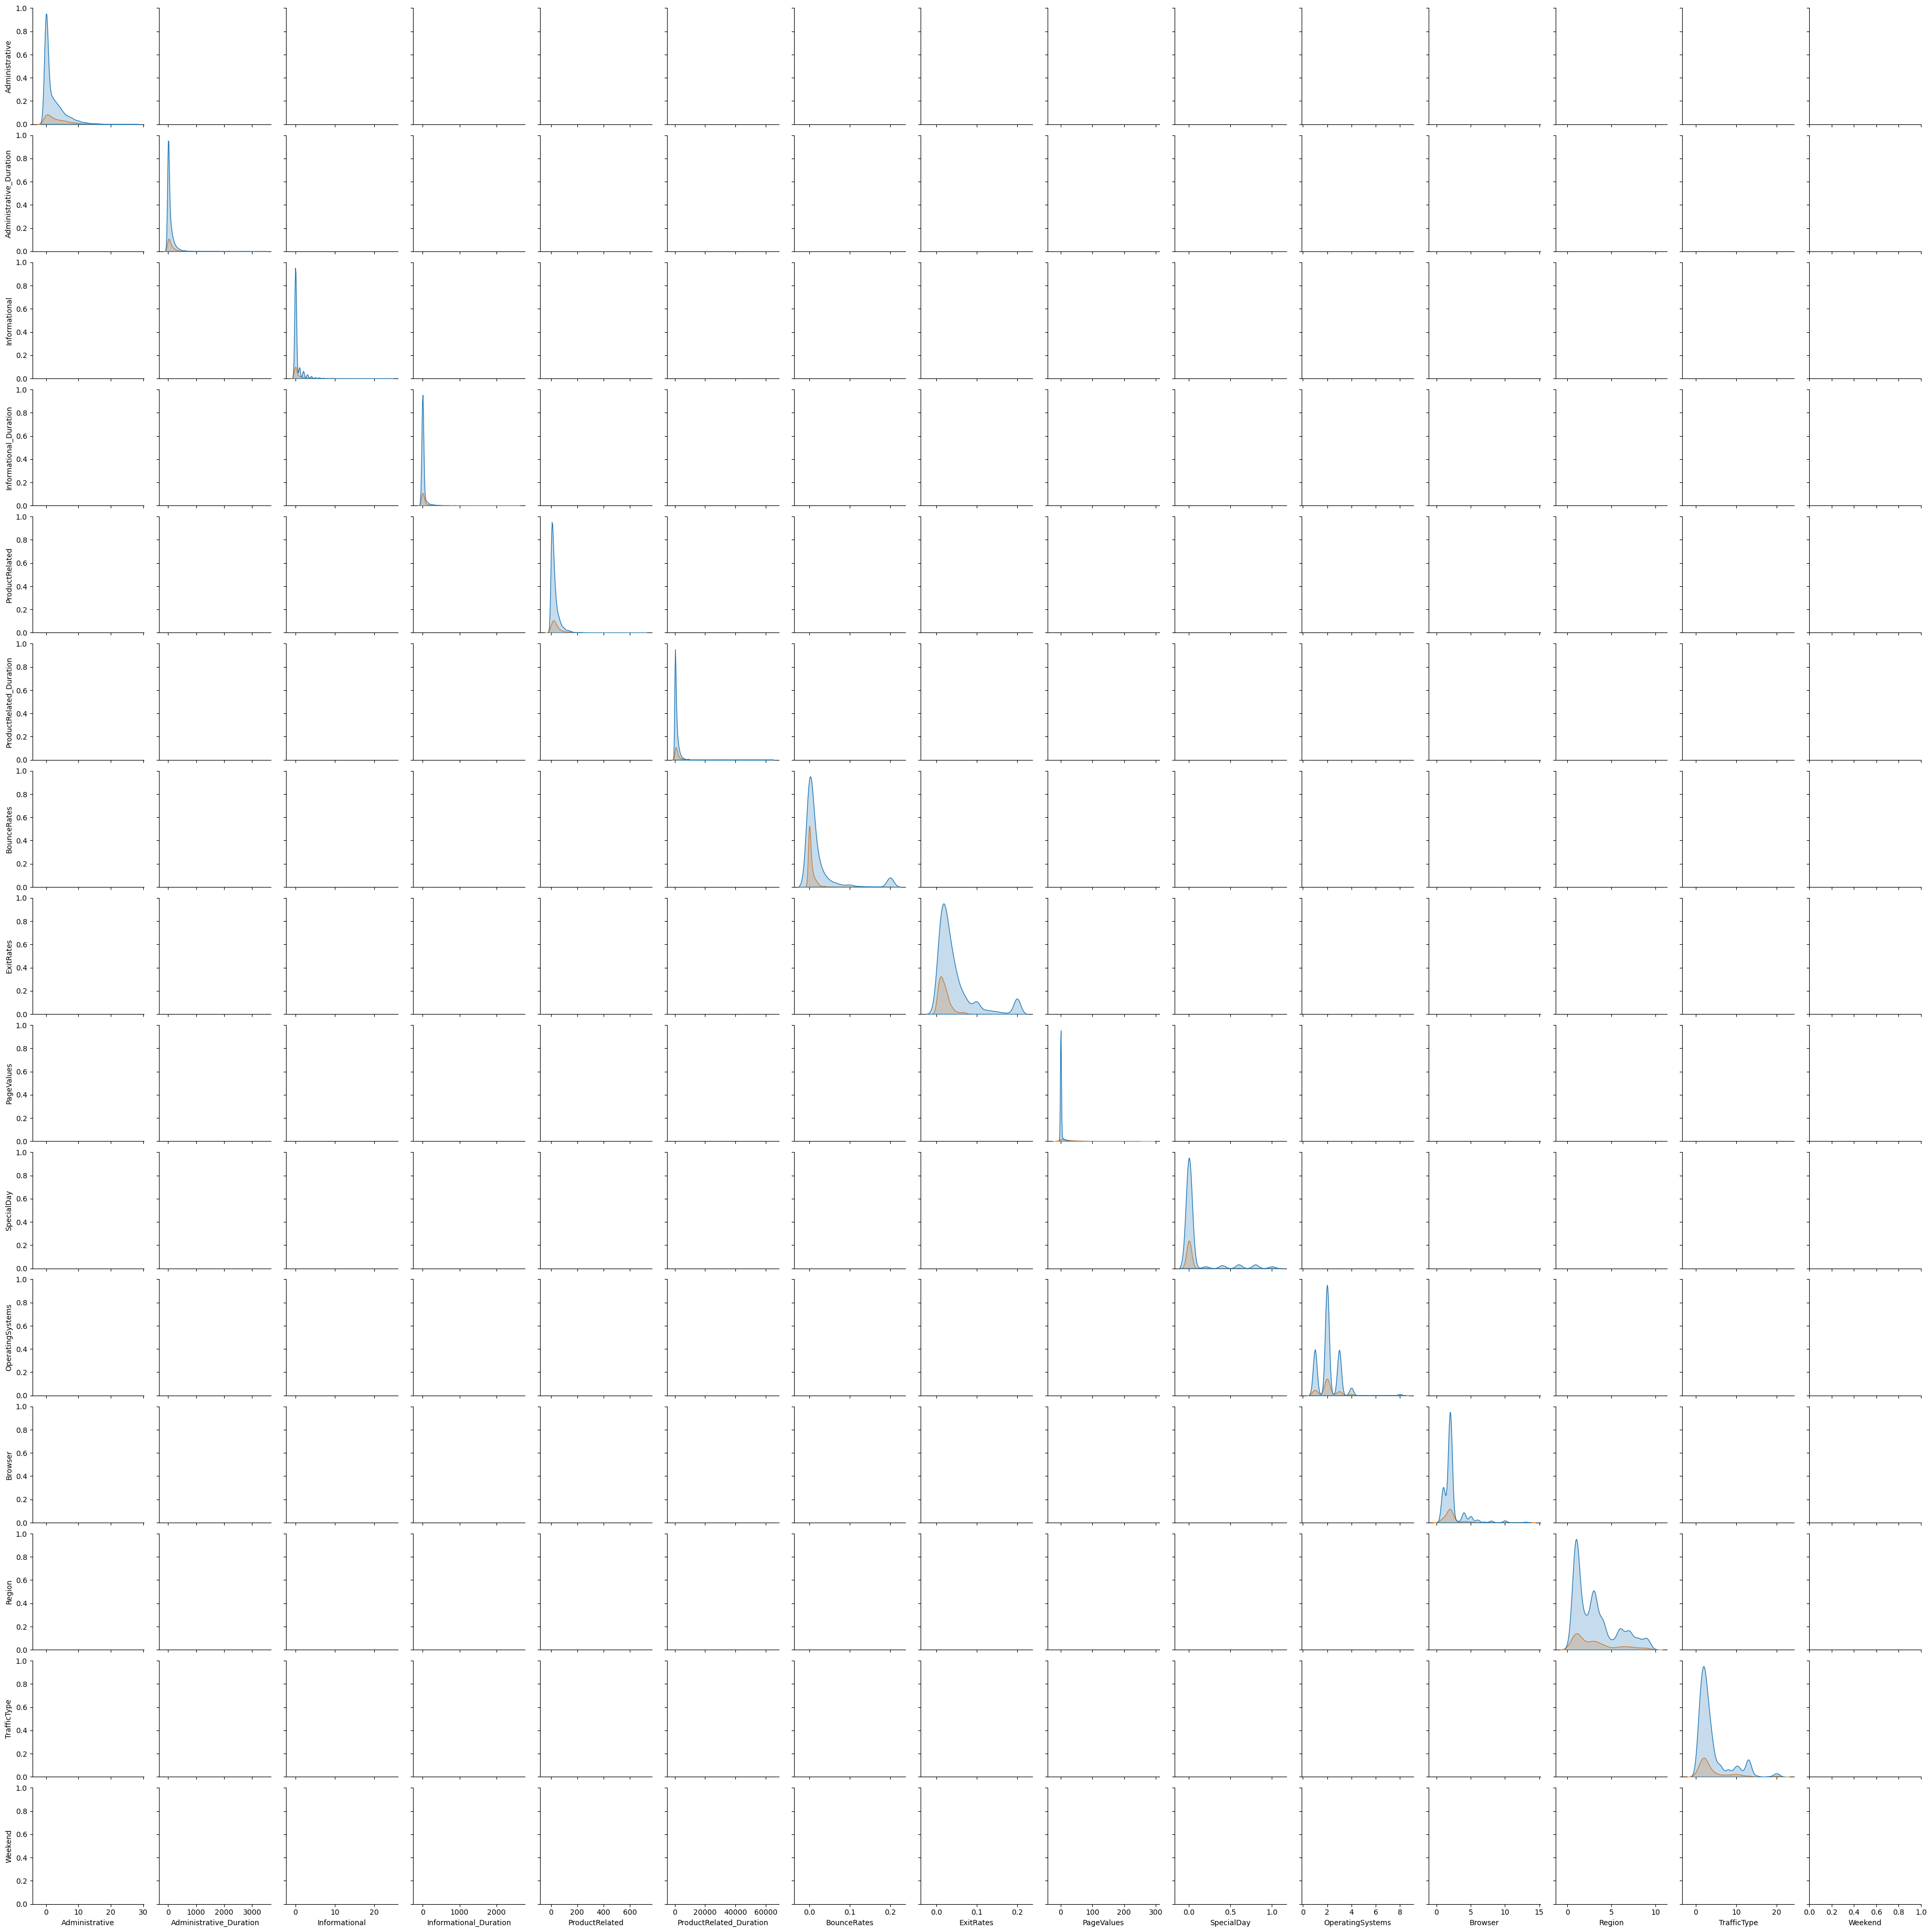

In [14]:
plt.figure(figsize=[10,5])
sns.pairplot(data=train, hue="Revenue")
plt.show()

c:\Users\simon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


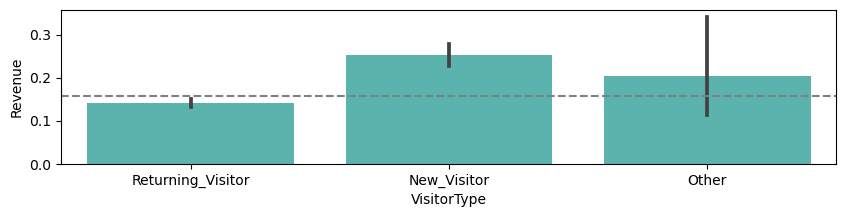

In [15]:

exploredata.plot_cat_by_target(data = train, target_variable = "Revenue", categorical_var = "VisitorType")

## Statistical Analysis

#### Hypothesis Testing

In [16]:
alpha = 0.05

* ##### Hypothesis 1
  - Ho : Browser type is independent of the revenue(either purchased made or not) of customers 
  - Ha : Browser type is not independent of the revenue(either purchased made or not) of customers


  Using that alpha = 0.05

<AxesSubplot:xlabel='Browser', ylabel='Count'>

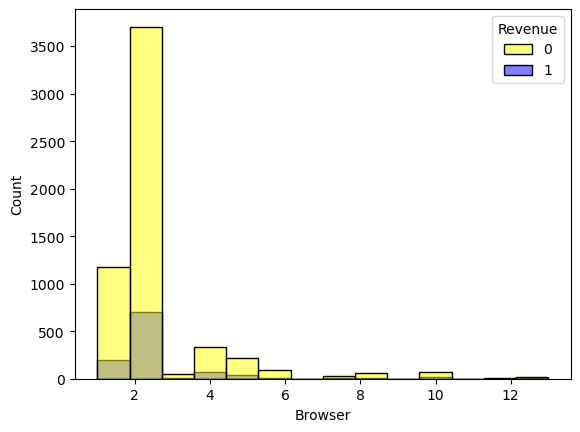

In [17]:
sns.histplot(data=train, x='Browser', hue="Revenue" , palette =["yellow", "blue"] )

In [18]:
test1 = exploredata.run_chi2(data= train, categorical_var = "Browser", target_variable="Revenue")
test1

(        chi2   p-value  degrees of freedom
 0  18.923421  0.090393                  12,
 Revenue     0    1
 Browser           
 1        1178  195
 2        3704  703
 3          54    3
 4         338   69
 5         213   43
 6          94    9
 7          24    4
 8          62   12
 9           1    0
 10         68   19
 11          2    1
 12          5    1
 13         23    9,
               0           1
 0   1158.431080  214.568920
 1   3718.285338  688.714662
 2     48.092186    8.907814
 3    343.395083   63.604917
 4    215.992976   40.007024
 5     86.903424   16.096576
 6     23.624232    4.375768
 7     62.435470   11.564530
 8      0.843723    0.156277
 9     73.403863   13.596137
 10     2.531168    0.468832
 11     5.062335    0.937665
 12    26.999122    5.000878)

In [19]:
test1[0]['p-value']< alpha

0    False
Name: p-value, dtype: bool

* ##### TakeAways from test 1
    - Since the p-value is greater than alpha (a significance value of 0.05), we failed to reject the null hypothesis that Browser type is independent of a users decision to make purchase.
    - We conclude that, a user decision to either make purchase from an online shop is not affected by the type of Browser they user
    - This will help us in our next method about feature engineering and feature selection to improve the effectives of some models like the Random forest classifier
    - We will not include Browser type in the features.

* #### Hypothesis 2

  + Ho : VisitorType is independent of the purchase decision of the user
  + Ha : VisitorType is not independent of the purchase decision of the user

<AxesSubplot:xlabel='VisitorType', ylabel='Count'>

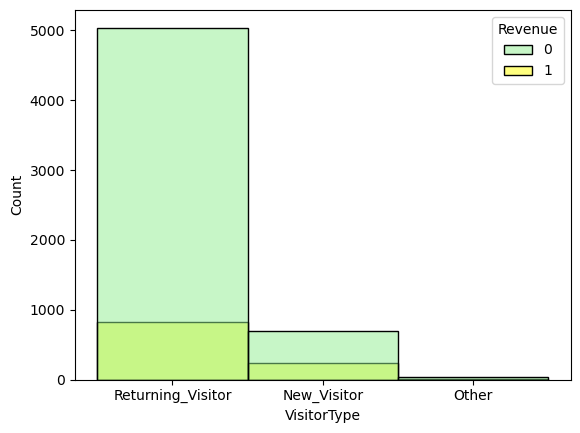

In [20]:
sns.histplot(data=train, x="VisitorType", hue="Revenue", palette=["lightgreen", "yellow"])

In [21]:
test2 = exploredata.run_chi2(data=train, categorical_var = "VisitorType", target_variable = "Revenue")
test2

(       chi2       p-value  degrees of freedom
 0  76.87805  2.023688e-17                   2,
 Revenue               0    1
 VisitorType                 
 New_Visitor         692  234
 Other                35    9
 Returning_Visitor  5039  825,
              0           1
 0   781.287094  144.712906
 1    37.123793    6.876207
 2  4947.589113  916.410887)

In [22]:
test2[0]["p-value"] < alpha

0    True
Name: p-value, dtype: bool

* ##### TakeAways from test 2
    - Since the p-value is less than alpha (a significance value of 0.05), we reject the null hypothesis that Visitor type is independent of a users decision to make purchase.
    - We conclude that, a user decision to either make purchase from an online shop is not independent of the Visitors Type (Either returning user or new user)
    - This will help us in our next method about feature engineering and feature selection to improve the effectives of some models like the Random forest classifier
    - We will include VisitorType in the features for our Random Forest classifer training

* #### Hypothesis 3
    * Ho: ProductRelated is independent of the purchase decision of the user
    * Ha: ProductRelated is independent of the purchase decison of the user

c:\Users\simon\anaconda3\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='ProductRelated', ylabel='Count'>

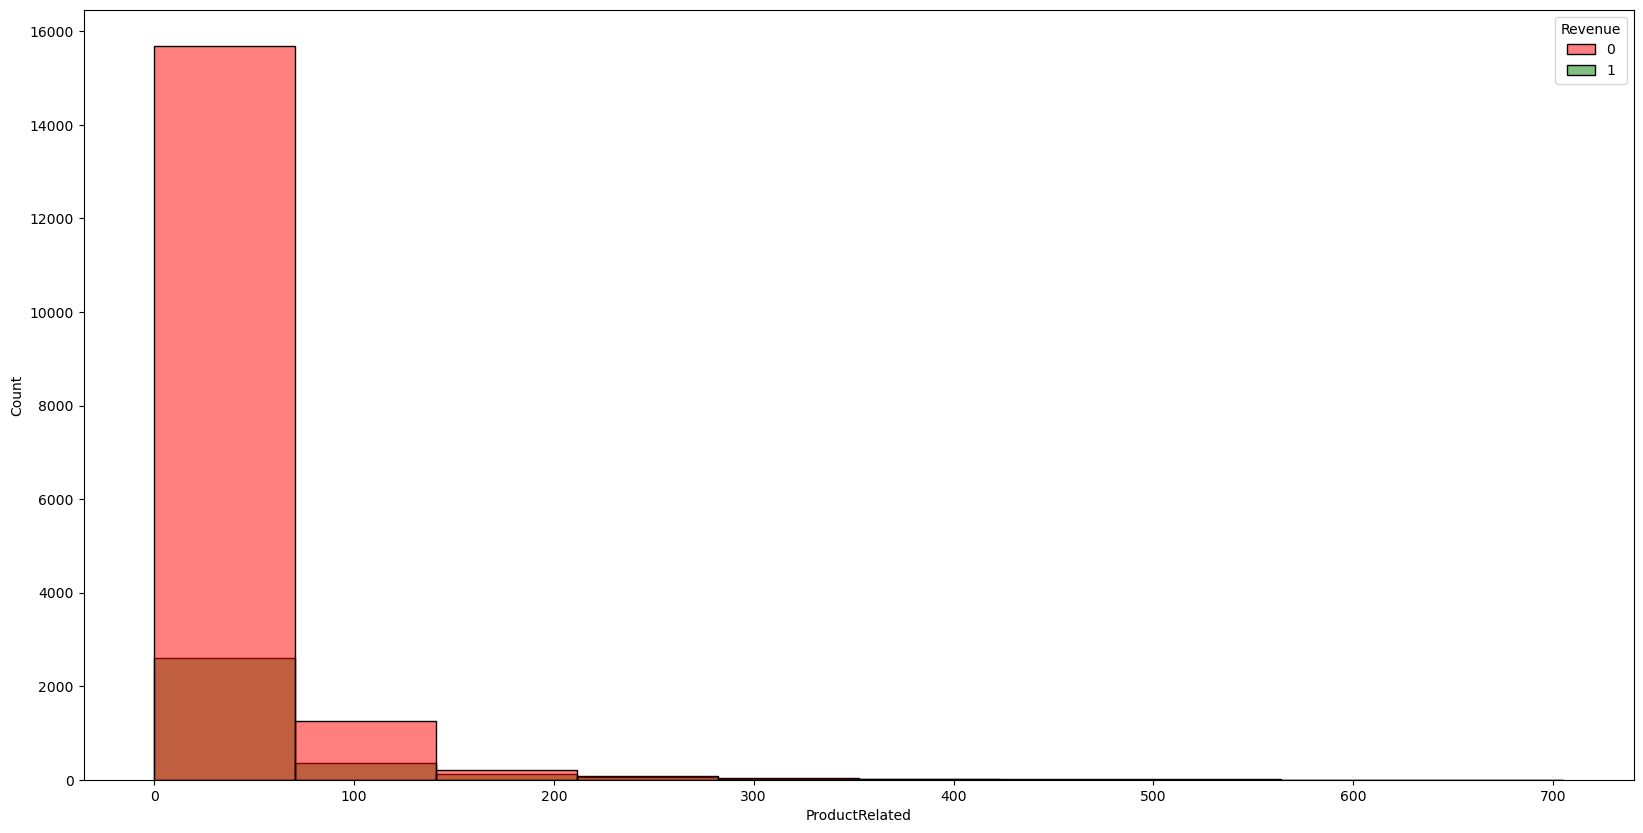

In [23]:
plt.figure(figsize=[20,10])
sns.histplot(data = train,weights=3, x='ProductRelated', hue="Revenue", palette=["red", "green"])

In [24]:
test3 = exploredata.run_chi2(data=train, categorical_var="ProductRelated", target_variable="Revenue")

* ##### TakeAways from test 3

* #### Hypothesis 4
  - Ho:Operating Systems is independent of a users buying decision
  - Ha: Operating Systems is not independent of a users buying decision

c:\Users\simon\anaconda3\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='OperatingSystems', ylabel='Count'>

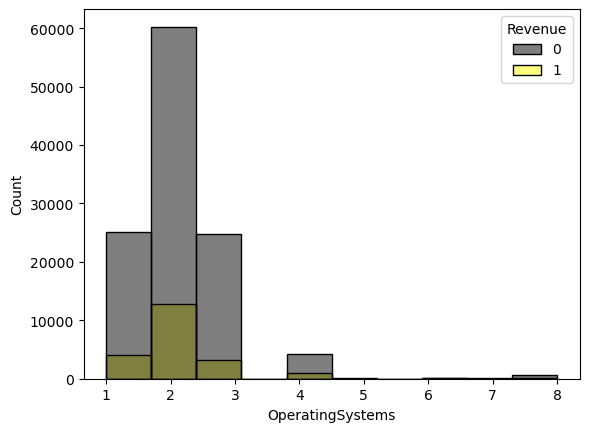

In [25]:
sns.histplot(data = train, weights=20, x = "OperatingSystems", hue = "Revenue", palette=["Black", "Yellow"])

In [26]:
test4 = exploredata.run_chi2(data=train, categorical_var = "OperatingSystems", target_variable = "Revenue")[0]

* ##### TakeAways from test 4

* #### Hypothesis 5

In [27]:
train_ = train.copy()

In [28]:
# train_.Weekend = train_.Weekend.apply(exploredata.binary_to_ints)
# train_.head(1)
train_.Weekend = train_.Weekend.astype(str)
train_.head(1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
268,0,0.0,0,0.0,15,1559.6,0.0,0.033846,0.0,0.0,Mar,2,4,1,1,Returning_Visitor,False,0


In [ ]:

sns.histplot(data=train, x="Weekend", hue="Revenue")

In [ ]:
test5 = exploredata.run_chi2(data = train, categorical_var = "Weekend", target_variable = "Revenue")
test5

In [ ]:
test5[0]['p-value'] < alpha

* ##### TakeAways from test 5
    - Since the p-value is greater than alpha (a significance value of 0.05), we failed to reject the null hypothesis that Weekend is independent of a users decision to make purchase.
    - We conclude that, a user decision to either make purchase from an online shop is not affected by the type whethe the user visits the website in weekends or not
    - This pre-informs us that Weekend as a feature will not be used in our feature engineering and feature selection to improve the effectives of some models like the Random forest classifier
    - We will not include Weekend in the features.

## DATA PREPROCESSING

In [ ]:
# def convert_T_F_to_ints(data):
  

## FEATURE ENGINEERING

## MODEL TRAINING AND TESTING

## MODEL EVALUATION